<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab1h/blob/main/IV_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lab1h Instant velocity experiment

In [1]:
!pip install uncertainties

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.8 MB/s eta 0:00:00


In [2]:
from uncertainties import ufloat
from uncertainties.umath import *
import numpy as np
import matplotlib.pyplot as plt




## Expected acceleration and friction coefficeny

$$
a = g \frac{h}{L}
$$

$$
\mu  = \frac{a_{up} - a_{down}}{2 g}
$$

In [37]:
L = ufloat(1288, 1)*1e-3 #mm
l = ufloat(124, .1)*1e-3 #mm
h = ufloat(20.0, .1)* 1e-3 #mm
g = ufloat(9.7949, 1e-4)

a_expected = g*h/L
print(f'Expected acceleration: {a_expected*1e3} mm/s2')

Expected acceleration: 152.1+/-0.8 mm/s2


## measured time and velocity

### Cutting data

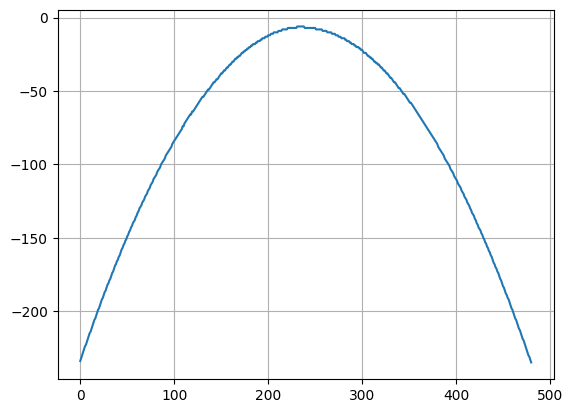

In [38]:
N = 236
t_, count = np.genfromtxt('lab3_1h_rate_200.txt', delimiter='\t', usecols=[1,3], unpack=True)
plt.plot(count)
plt.grid()
plt.show()

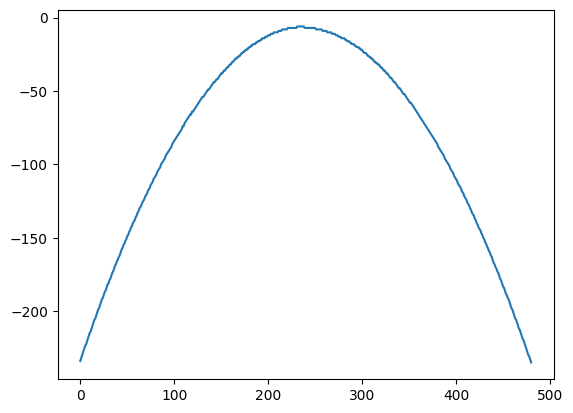

In [34]:
ix0 = 0
ix1 = len(count)
plt.plot(count[ix0:ix1])


### Approximation and friction coefficient

<ipython-input-39-952f23911b8d>:18: FutureWarning: AffineScalarFunc.__abs__() is deprecated. It will be removed in a future release.
  mu = np.abs((a_up - a_down) / (2*g))


Acceleration - parabolic fit: -166.39+/-0.08 mm/s2
Acceleration - upwards      : -164.45+/-0.21 mm/s2
Acceleration - downwards    : -160.91+/-0.18 mm/s2
Friction coeff    : 0.000180+/-0.000014 mm/s2


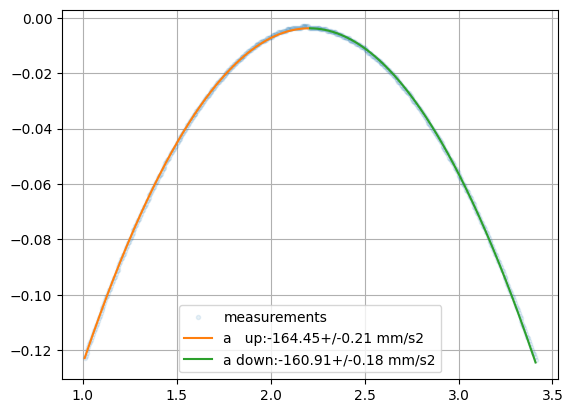

In [39]:
def get_acceleration(t, x):
  p, cov = np.polyfit(t, x, 2, cov=True)
  poly = np.poly1d(p)
  err = np.sqrt(np.diag(cov))
  return 2* ufloat(p[0], err[0]), poly


t = t_[ix0:ix1]
x = count[ix0:ix1] / N * l.n
plt.plot(t, x, '.', alpha=0.1, label='measurements')

a, poly = get_acceleration(t, x)
v0 = poly.coeffs[1]
t_vertex = - v0 / a.nominal_value

a_up, poly_ap = get_acceleration(t[t<t_vertex], x[t<t_vertex])
a_down, poly_down = get_acceleration(t[t>t_vertex], x[t>t_vertex])
mu = np.abs((a_up - a_down) / (2*g))
print(f'Acceleration - parabolic fit: {a*1e3} mm/s2')
print(f'Acceleration - upwards      : {a_up*1e3} mm/s2')
print(f'Acceleration - downwards    : {a_down*1e3} mm/s2')
print(f'Friction coeff    : {mu} mm/s2')
plt.plot(t[t<t_vertex], poly(t[t<t_vertex]), label=f'a   up:{a_up*1e3} mm/s2')
plt.plot(t[t>t_vertex], poly(t[t>t_vertex]), label=f'a down:{a_down*1e3} mm/s2')
plt.legend()
plt.grid()
plt.show()

### Discrete derivative

[-0.16568792  0.36581699]
[0.00019238 0.00044402]


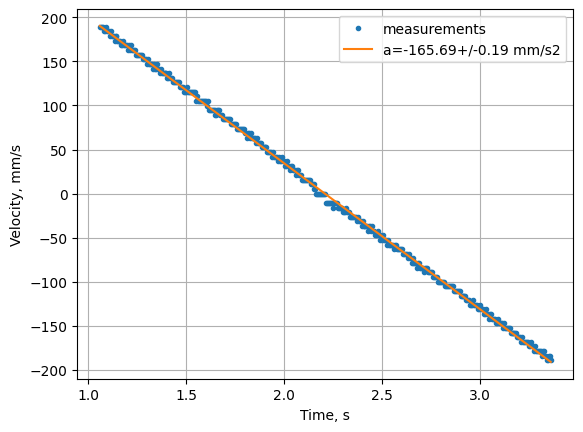

In [40]:
def derivative(t, x, n):
  dx = x[2*n:] - x[:-2*n]
  dt = t[2*n:] - t[:-2*n]
  v = dx / dt
  t_trimmed = t[n:-n]
  p, cov = np.polyfit(t_trimmed, v, 1, cov=True)
  print(p)
  err = np.sqrt(np.diag(cov))
  print(err)
  a = ufloat(p[0], err[0])
  v0 = ufloat(p[1], err[1])
  return t_trimmed, v, a, v0

t1, v1, a, v0 = derivative(t, x, 10)
plt.plot(t1, v1*1e3, '.', label='measurements')
plt.plot(t1, 1e3*(t1*a.n + v0.n), label=f'a={a*1e3} mm/s2')
plt.legend()
plt.xlabel('Time, s')
plt.ylabel('Velocity, mm/s')
plt.grid()